<a href="https://colab.research.google.com/github/Derrick-Majani/VISA_Applications/blob/main/EasyVisa_Fullcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [ ]:
# this will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
import io
import os
import sys

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

## Data Overview

- Observations
- Sanity checks

In [ ]:
# Use Local drives to upload the csv on google colab
from google.colab import files
uploaded = files.upload()

Saving EasyVisa.csv to EasyVisa.csv


In [ ]:
# Read data uploaded on root / local directory on cloud using I/O library
df = pd.read_csv(io.BytesIO(uploaded['EasyVisa.csv']))
df.sample(n=5)
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")  # f-string
# I'm now going to look at 10 random rows
# I'm setting the random seed via np.random.seed so that
# I get the same random results every time
np.random.seed(1)
df.sample(n=10)

There are 25480 rows and 12 columns.


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
17639,EZYV17640,Asia,Bachelor's,Y,N,567,1992,Midwest,26842.9100,Year,Y,Certified
23951,EZYV23952,Oceania,Bachelor's,N,N,619,1938,Midwest,66419.9800,Year,Y,Certified
8625,EZYV8626,Asia,Master's,N,N,2635,2005,South,887.2921,Hour,Y,Certified
20206,EZYV20207,Asia,Bachelor's,Y,Y,3184,1986,Northeast,49435.8000,Year,Y,Certified
7471,EZYV7472,Europe,Bachelor's,Y,N,4681,1928,West,49865.1900,Year,Y,Denied
3433,EZYV3434,Asia,Bachelor's,Y,N,222,1989,South,813.7261,Hour,Y,Certified
24440,EZYV24441,Europe,High School,N,Y,3278,1994,South,204948.3900,Year,Y,Denied
12104,EZYV12105,Asia,Master's,Y,N,1359,1997,West,202237.0400,Year,N,Certified
15656,EZYV15657,Asia,Bachelor's,N,N,2081,2003,West,111713.0200,Year,Y,Denied
23110,EZYV23111,North America,Bachelor's,Y,N,854,1998,Northeast,444.8257,Hour,Y,Denied


### View the first and last 5 rows of the dataset

---



In [ ]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### Check the data types of the columns for the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


* `no_of_employees`, ` yr_of_estab`, and `prevailing_wage` are numeric features while rest are objects.
* There are no null values in the dataset.

In [ ]:
# copying data to another variable to avoid any changes to original data
data = df.copy()

In [ ]:
# checking for duplicate values
data.duplicated().sum()

0

- There are no duplicates in the data

In [ ]:
def missing_check(data):
    total = data.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(data)

,Total,Percent
case_id,0,0.0
continent,0,0.0
education_of_employee,0,0.0
has_job_experience,0,0.0
requires_job_training,0,0.0
no_of_employees,0,0.0
yr_of_estab,0,0.0
region_of_employment,0,0.0
prevailing_wage,0,0.0
unit_of_wage,0,0.0


- There are no missing values in the dataset

In [ ]:
data.describe().T.style.highlight_min(color="lightgreen", axis=0)

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.000000,5667.043210,22877.928848,-26.000000,1022.000000,2109.000000,3504.000000,602069.000000
yr_of_estab,25480.000000,1979.409929,42.366929,1800.000000,1976.000000,1997.000000,2005.000000,2016.000000
prevailing_wage,25480.000000,74455.814592,52815.942327,2.136700,34015.480000,70308.210000,107735.512500,319210.270000


In [ ]:
data.describe(exclude=np.number).T.style.highlight_min(color="lightgreen", axis=0)

,count,unique,top,freq
case_id,25480,25480,EZYV01,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


- There is a problem with number of employees as employees cannot be negative.
- There is a lso a huge difference between the 3rd quartile and the maximum value for number of employees and prevailing wage rage which could indicate outliers.
- Most employees come from Asian continent.
- Most VISA applications have been Certified.
* Asia is the highest continent with employees.
* Most employees have Bachelor's level of Education.
* Most employees have job experience.
* Most employees do not require job training 
* Northeast region is the highest region of employment in the US.
* Year is the most unit of prevailing wage.
* Most position for work are full time positions

In [ ]:
# We can drop 'case_id' column as it is an ID variable and will not add value to the model.
# Dropping the columns from the dataframe
data.drop(columns=["case_id"], inplace=True)

In [ ]:
data.loc[data["no_of_employees"] < 0].shape

(33, 11)

In [ ]:
# taking the absolute values for number of employees
data["no_of_employees"] = abs(data["no_of_employees"])

In [ ]:
for feature in data.columns:  # Loop through all columns in the dataframe
    if (
        data[feature].dtype == "object"
    ):  # Only apply for columns with categorical strings
        data[feature] = pd.Categorical(data[feature])  # Replace strings with an integer
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25480 non-null  category
 1   education_of_employee  25480 non-null  category
 2   has_job_experience     25480 non-null  category
 3   requires_job_training  25480 non-null  category
 4   no_of_employees        25480 non-null  int64   
 5   yr_of_estab            25480 non-null  int64   
 6   region_of_employment   25480 non-null  category
 7   prevailing_wage        25480 non-null  float64 
 8   unit_of_wage           25480 non-null  category
 9   full_time_position     25480 non-null  category
 10  case_status            25480 non-null  category
dtypes: category(8), float64(1), int64(2)
memory usage: 797.7 KB


In [ ]:
# Frequency tables for each categorical feature
for column in data.select_dtypes(include=['category']).columns:
    display(pd.crosstab(index=data[column], columns='% observations', normalize='columns'))

col_0,% observations
continent,
Africa,0.021625
Asia,0.661735
Europe,0.146468
North America,0.129199
Oceania,0.007535
South America,0.033438


col_0,% observations
education_of_employee,
Bachelor's,0.401648
Doctorate,0.086028
High School,0.134223
Master's,0.378100


col_0,% observations
has_job_experience,
N,0.419074
Y,0.580926


col_0,% observations
requires_job_training,
N,0.884027
Y,0.115973


col_0,% observations
region_of_employment,
Island,0.014717
Midwest,0.169035
Northeast,0.282378
South,0.275392
West,0.258477


col_0,% observations
unit_of_wage,
Hour,0.084655
Month,0.003493
Week,0.010675
Year,0.901177


col_0,% observations
full_time_position,
N,0.10624
Y,0.89376


col_0,% observations
case_status,
Certified,0.667896
Denied,0.332104


- Certified VISA cases occupy 66% of the VISA status.
- 89% of the observations are on full time position.
- Island is the least region of employment while Northeast is the highest.
- Most jobs require job training

In [ ]:
# Making a list of all catrgorical variables
cat_col = list(data.select_dtypes("category").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
--------------------------------------------------
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
--------------------------------------------------
Y    14802
N    10678
Name: has_job_experience, dtype: int64
--------------------------------------------------
N    22525
Y     2955
Name: requires_job_training, dtype: int64
--------------------------------------------------
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64
--------------------------------------------------
Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_wage, dtype: int64
--------------------------------------------------
Y    22773
N     2707
Name: full_time_position, dty

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

### Univariate Analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="white"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

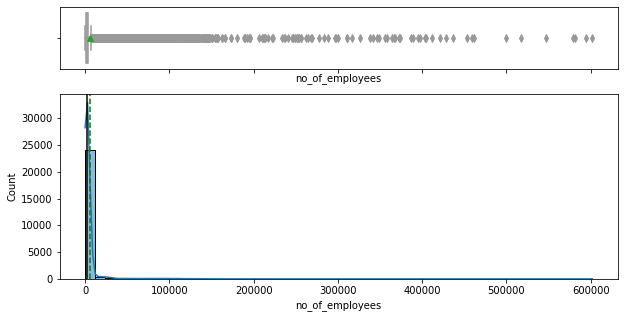

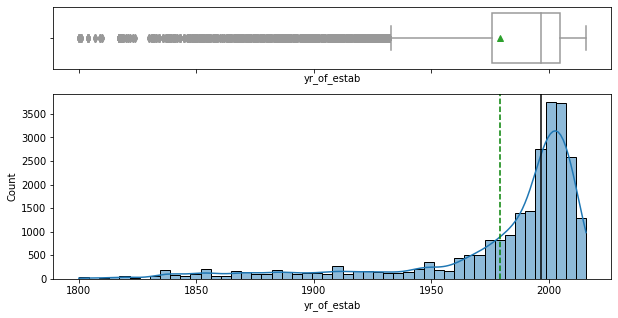

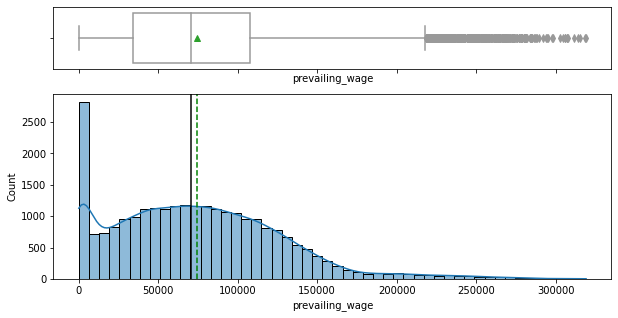

In [ ]:
# selecting numerical columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
for item in num_cols:
    histogram_boxplot(data, item, bins=50, kde=True, figsize=(10, 5))

* The distribution of the number of employees is heavily right-skewed.
* Some companies have more than 500k employees. Such companies might have multiple offices around the world.
* The distribution of prevailing wage is skewed to the right.

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Observations on continent

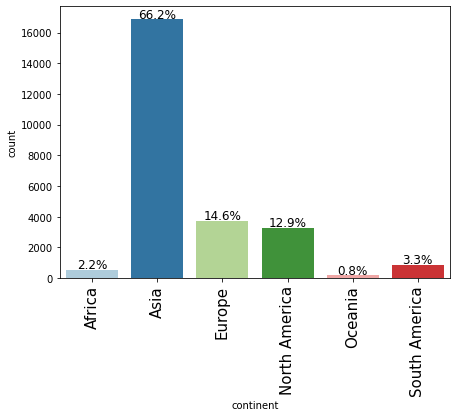

In [ ]:
labeled_barplot(data, "continent", perc=True)

* 66.2 % of the employees come from Asia.

### Observations on education_of_employee

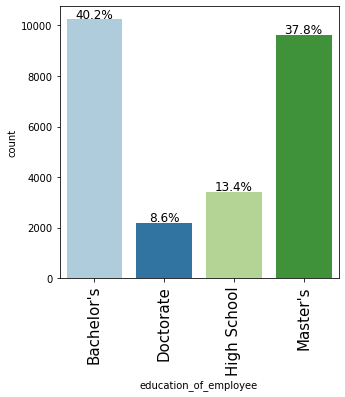

In [ ]:
labeled_barplot(data, "education_of_employee", perc=True)

Observation
* Bachelor's qualification is the highest and Doctorate is the lowest qualification on the employees

### Observations on Job Experience

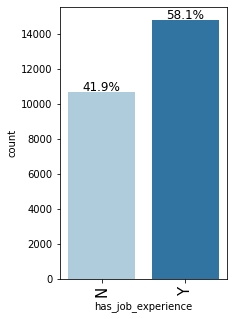

In [ ]:
labeled_barplot(data, "has_job_experience", perc=True)

Observation
* 58.1% of the employees have job experience.
* 41.9 % do not have job experience.

### Observation on requires_job_training

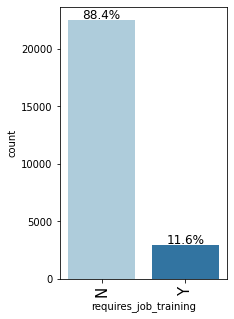

In [ ]:
labeled_barplot(data, "requires_job_training", perc=True)


* 88.4 % of the eomployees require job training 

### Observation on region_of_employment

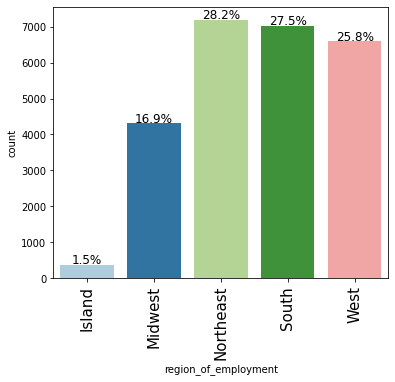

In [ ]:
labeled_barplot(data, "region_of_employment", perc=True)


* Island is the lowest Region and Northeast is the highest region of employment in the US

### Observation on full_time_position

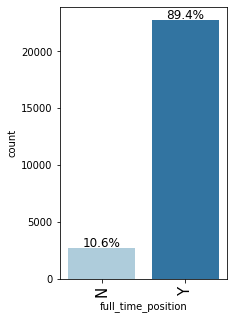

In [ ]:
labeled_barplot(data, "full_time_position", perc=True)


* 89.4% of the employees are in full time position while 10.6% are not

### Observation on case_status




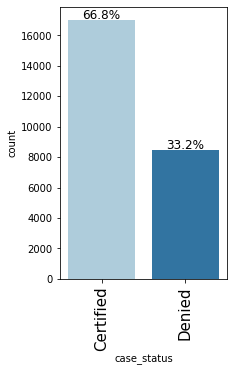

In [ ]:
labeled_barplot(data, "case_status", perc=True)


Observation
* 66.8% of the VISA applicants have been Certified while 33.2% have been declined

## Bivariate Analysis

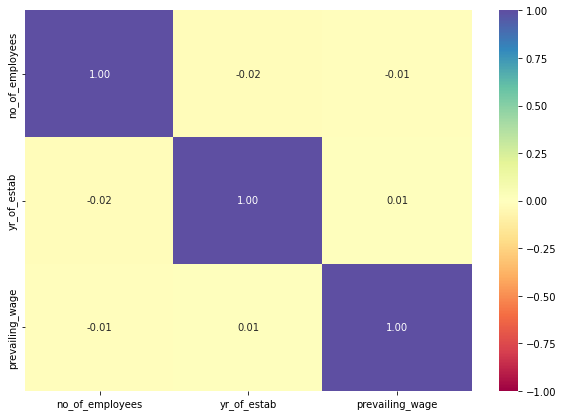

In [ ]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* There's no correlation within the independent features of the data.

### Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


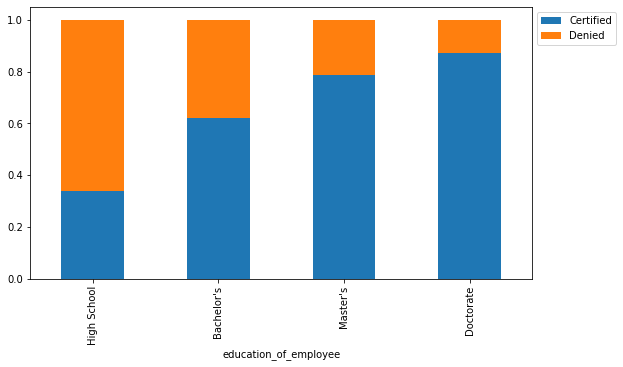

In [ ]:
stacked_barplot(data, "education_of_employee", "case_status")

- High School VISA applications are mostly denied
- Doctorate levels of education have the hoghest Certified VISA applications

### How does the visa status vary across different continents?

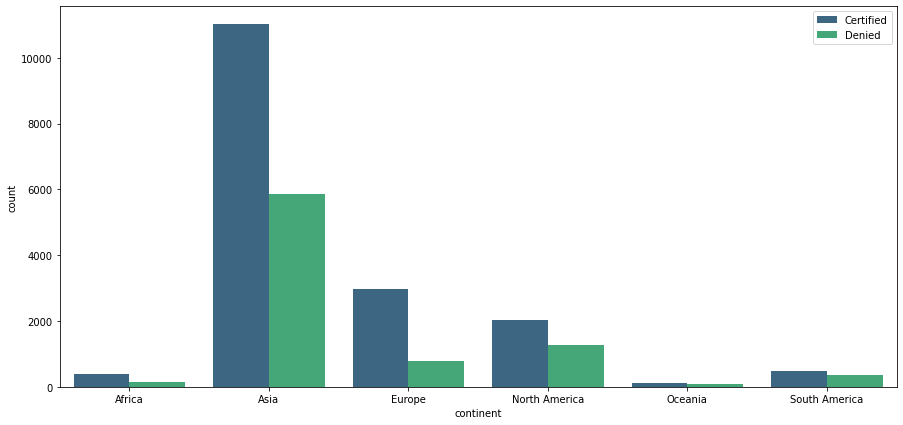

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(data["continent"],hue=data["case_status"],palette='viridis')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

- Oceania have the least cases of CISA Certified and Denied cases.
- Asia has the highest cases of VISA Certified and Denied cases

### Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

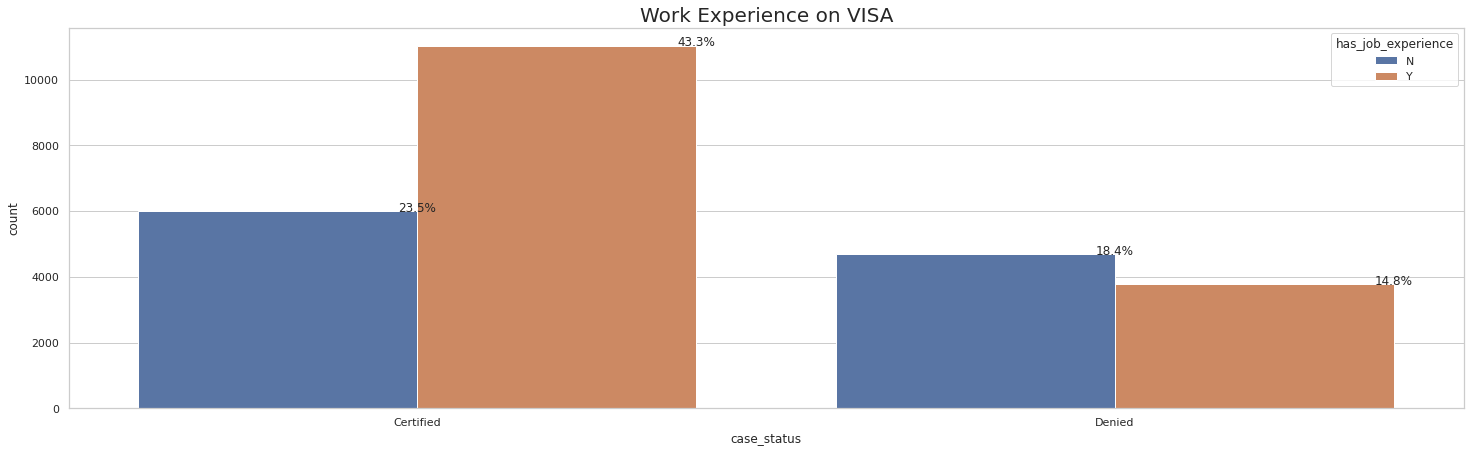

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(25,7))
total = float(len(data))
ax = sns.countplot(x="case_status", hue="has_job_experience", data=data)
plt.title('Work Experience on VISA', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

- 43.3% of the VISA Certified cases have job experiece.
- 18.4% of the Denied VISA cases do not have job experience

### In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

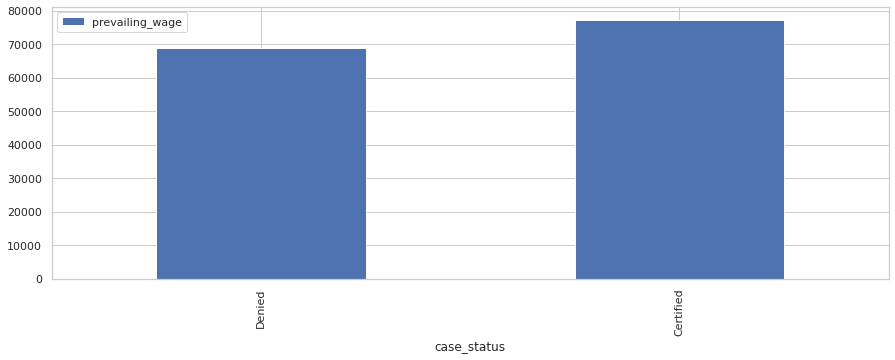

In [ ]:
data.groupby(by=["case_status"])["prevailing_wage"].mean().reset_index().sort_values(
    ["prevailing_wage"]
).plot(x="case_status", y="prevailing_wage", kind="bar", figsize=(15, 5))
plt.show()

- Certified VISA applications have a high prevailing wage rate than denied cases

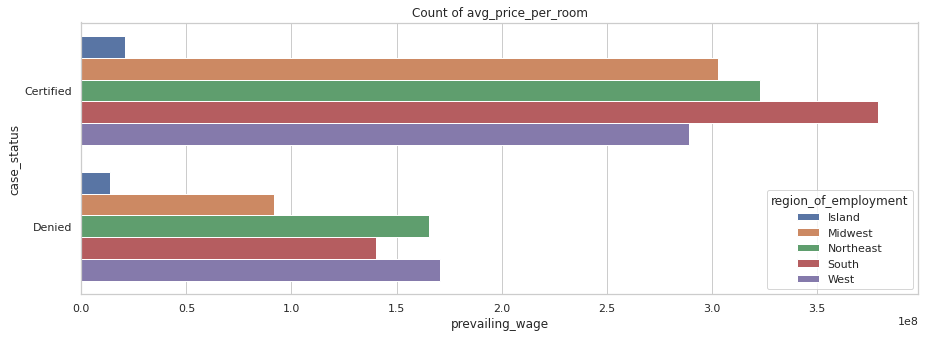

In [ ]:
df1= data['prevailing_wage'].groupby([data['case_status'],data['region_of_employment']]).sum()
df2=df1.reset_index().sort_values(by='prevailing_wage',ascending=False)
fig = plt.figure(figsize=(15,5))
plt.title('Count of avg_price_per_room')

sns.barplot(df2['prevailing_wage'],df2['case_status'],hue=df2["region_of_employment"]);

- The South region have the highest prevailing wage rate of Certified cases
- Island region of employment has the least prevailing wage rate on Denied case 

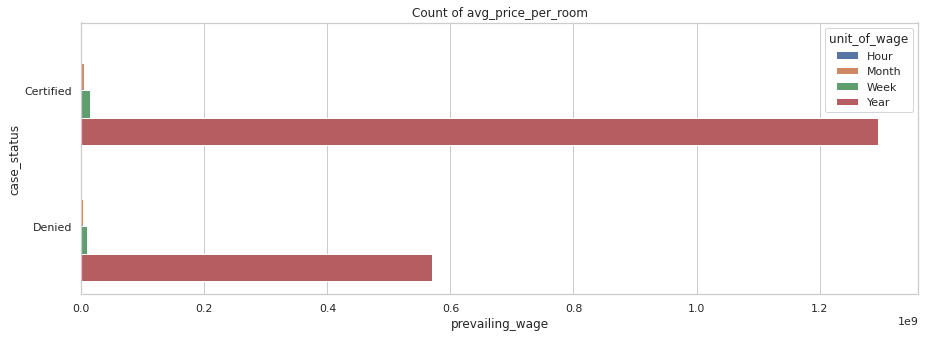

In [ ]:
df1= data['prevailing_wage'].groupby([data['case_status'],data['unit_of_wage']]).sum()
df2=df1.reset_index().sort_values(by='prevailing_wage',ascending=False)
fig = plt.figure(figsize=(15,5))
plt.title('Count of avg_price_per_room')

sns.barplot(df2['prevailing_wage'],df2['case_status'],hue=df2["unit_of_wage"]);

- Certified VISA cases have the highest yearly unit of prevailing wage
- There were less or no hourly wage rate recorded for any of the VISA cases

### Outlier Check

- Let's check for outliers in the data.

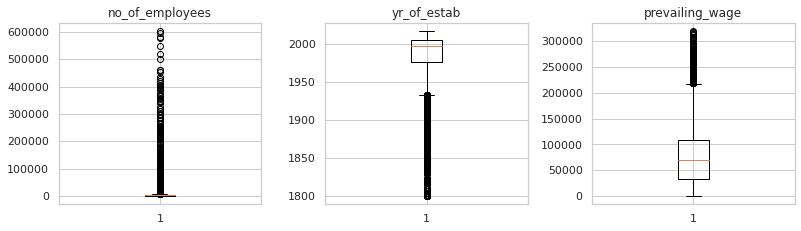

In [ ]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- There are outliers on all the variables but we shall not treat them as they are proper values.

### Data Preparation for modeling

- We want to predict which visa will be certified.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [ ]:
data["case_status"] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

X = data.drop(["case_status"], axis=1)
Y = data["case_status"]


X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


### Model evaluation criterion

### Model can make wrong predictions as:

1. Model predicts that the visa application will get certified but in reality, the visa application should get denied.
2. Model predicts that the visa application will not get certified but in reality, the visa application should get certified. 

### Which case is more important? 
* Both the cases are important as:

* If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

* If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy. 



### How to reduce the losses?

* `F1 Score` can be used a the metric for evaluation of the model, greater the F1  score higher are the chances of minimizing False Negatives and False Positives. 
* We will use balanced class weights so that model focuses equally on both classes.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Decision Tree Model

In [ ]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### Checking model performance on training set

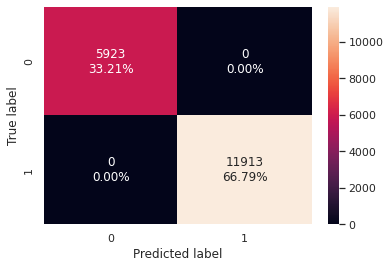

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


* Model has performed very well on the training set.
* As we know, a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.


#### Checking model performance on test set

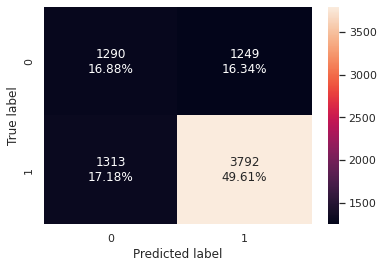

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test)

In [ ]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.664835,0.742801,0.752232,0.747487


* The decision tree model is overfitting the data as expected and not able to generalize well on the test set.


### Hyperparameter Tuning - Decision Tree

In [ ]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(10, 30, 5),
    "min_samples_leaf": [3, 5, 7],
    "max_leaf_nodes": [2, 3, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer, n_jobs=-1)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

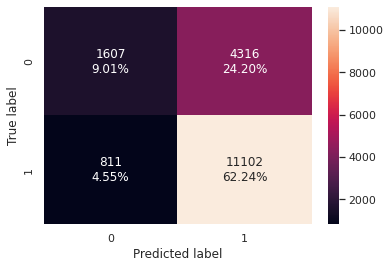

In [ ]:
confusion_matrix_sklearn(dtree_estimator, X_train, y_train)

In [ ]:
dtree_estimator_model_train_perf = model_performance_classification_sklearn(
    dtree_estimator, X_train, y_train
)
dtree_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.712548,0.931923,0.720067,0.812411


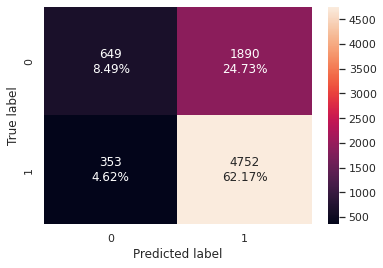

In [ ]:
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

In [ ]:
dtree_estimator_model_test_perf = model_performance_classification_sklearn(
    dtree_estimator, X_test, y_test
)
dtree_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.706567,0.930852,0.715447,0.809058


* The decision tree model has a very high recall but, the precision is quite less.
* The performance of the model after hyperparameter tuning has become generalized.
* We are getting an F1 score of 0.81 and 0.81 on the training and test set, respectively.
* Let's try building some ensemble models and see if the metrics improve.

## Building bagging and boosting models

### Bagging Classifier

In [ ]:
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train, y_train)

BaggingClassifier(random_state=1)

#### Checking model performance on training set

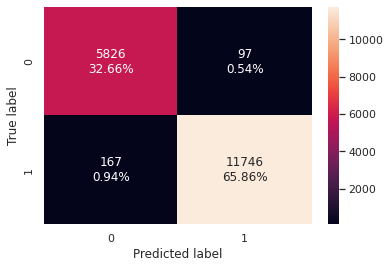

In [ ]:
confusion_matrix_sklearn(bagging_classifier, X_train, y_train)

In [ ]:
bagging_classifier_model_train_perf = model_performance_classification_sklearn(
    bagging_classifier, X_train, y_train
)
bagging_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.985198,0.985982,0.99181,0.988887


#### Checking model performance on test set

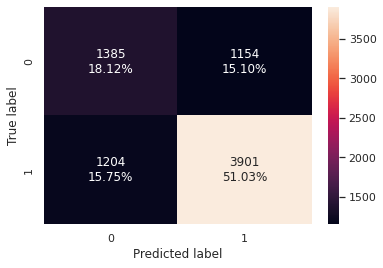

In [ ]:
confusion_matrix_sklearn(bagging_classifier, X_test, y_test)

In [ ]:
bagging_classifier_model_test_perf = model_performance_classification_sklearn(
    bagging_classifier, X_test, y_test
)
bagging_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.691523,0.764153,0.771711,0.767913


### Hyperparameter Tuning - Bagging Classifier

In [ ]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.8, 0.9],
    "max_features": [0.7, 0.8, 0.9],
    "n_estimators": np.arange(90, 120, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=100,
                  random_state=1)

#### Checking model performance on training set

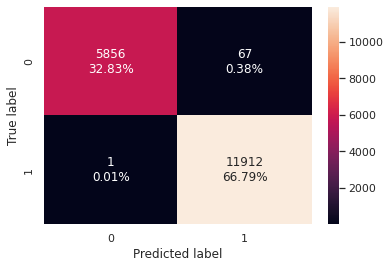

In [ ]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_train, y_train)

In [ ]:
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_train, y_train
)
bagging_estimator_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.996187,0.999916,0.994407,0.997154


#### Checking model performance on test set

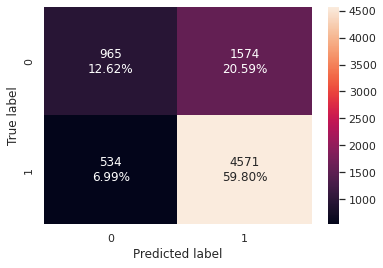

In [ ]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

In [ ]:
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_test, y_test
)
bagging_estimator_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.724228,0.895397,0.743857,0.812622


* After tuning the hyperparameters the bagging classifier is still overfitting.
* There's a big difference in the training and the test recall.

### Random Forest

In [ ]:
# Fitting the model
rf_estimator = RandomForestClassifier(random_state=1, class_weight="balanced")
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

#### Checking model performance on training set

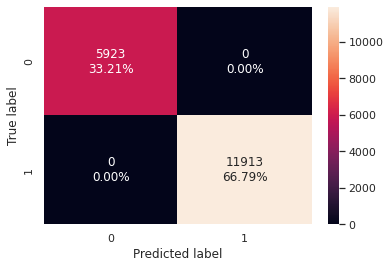

In [ ]:
confusion_matrix_sklearn(rf_estimator, X_train, y_train)

In [ ]:
# Calculating different metrics
rf_estimator_model_train_perf = model_performance_classification_sklearn(
    rf_estimator, X_train, y_train
)
rf_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


#### Checking model performance on test set

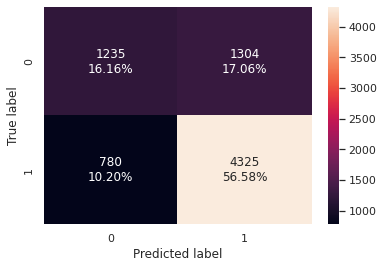

In [ ]:
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

In [ ]:
rf_estimator_model_test_perf = model_performance_classification_sklearn(
    rf_estimator, X_test, y_test
)
rf_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.727368,0.847209,0.768343,0.805851


- Model is overfitting on test data and performing well on traing

### Hyperparameter Tuning - Random Forest

In [ ]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [3, 5, 7],
    "n_estimators": np.arange(10, 40, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=acc_scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=7,
                       n_estimators=20, oob_score=True, random_state=1)

#### Checking model performance on training set

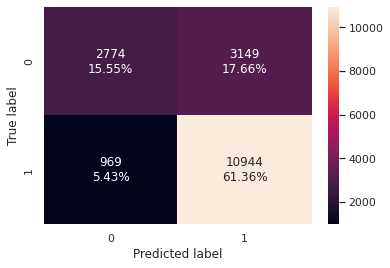

In [ ]:
confusion_matrix_sklearn(rf_tuned, X_train, y_train)

In [ ]:
rf_tuned_model_train_perf = model_performance_classification_sklearn(
    rf_tuned, X_train, y_train
)
rf_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.769119,0.91866,0.776556,0.841652


#### Checking model performance on test set

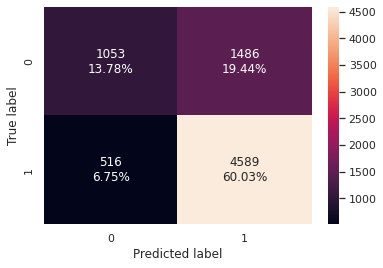

In [ ]:
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

In [ ]:
rf_tuned_model_test_perf = model_performance_classification_sklearn(
    rf_tuned, X_test, y_test
)
rf_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.738095,0.898923,0.755391,0.82093


* After hyperparameter tuning the model performance has generalized.
* We have an F1 score of 0.84 and 0.82 on the training and test data, respectively.
* The model has a high recall and a good precision.

### AdaBoost Classifier

In [ ]:
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

#### Checking model performance on training set

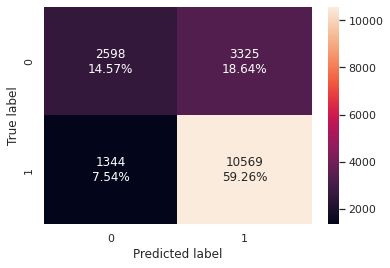

In [ ]:
confusion_matrix_sklearn(ab_classifier, X_train, y_train)

In [ ]:
ab_classifier_model_train_perf = model_performance_classification_sklearn(
    ab_classifier, X_train, y_train
)
ab_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.738226,0.887182,0.760688,0.81908


#### Checking model performance on test set

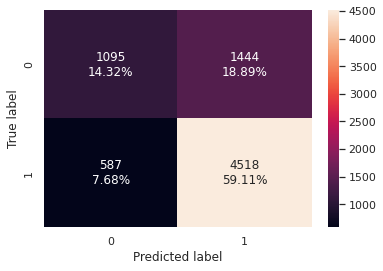

In [ ]:
confusion_matrix_sklearn(ab_classifier, X_test, y_test)

In [ ]:
ab_classifier_model_test_perf = model_performance_classification_sklearn(
    ab_classifier, X_test, y_test
)
ab_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.734301,0.885015,0.757799,0.816481


### Hyperparameter Tuning - AdaBoost Classifier

In [ ]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=3, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(60, 100, 10),
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=90, random_state=1)

#### Checking model performance on training set

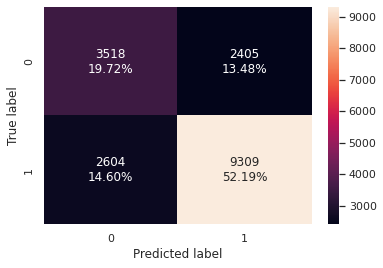

In [ ]:
confusion_matrix_sklearn(abc_tuned, X_train, y_train)

In [ ]:
abc_tuned_model_train_perf = model_performance_classification_sklearn(
    abc_tuned, X_train, y_train
)
abc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.719163,0.781415,0.79469,0.787997


#### Checking model performance on test set

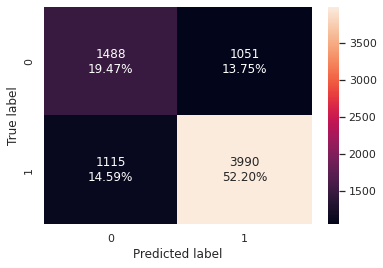

In [ ]:
confusion_matrix_sklearn(abc_tuned, X_test, y_test)

In [ ]:
abc_tuned_model_test_perf = model_performance_classification_sklearn(
    abc_tuned, X_test, y_test
)
abc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.716641,0.781587,0.79151,0.786517


- Model performing better after hypertunning 

### Gradient Boosting Classifier

In [ ]:
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

#### Checking model performance on training set

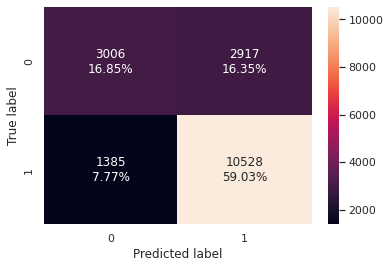

In [ ]:
confusion_matrix_sklearn(gb_classifier, X_train, y_train)

In [ ]:
gb_classifier_model_train_perf = model_performance_classification_sklearn(
    gb_classifier, X_train, y_train
)
gb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.758802,0.88374,0.783042,0.830349


#### Checking model performance on test set

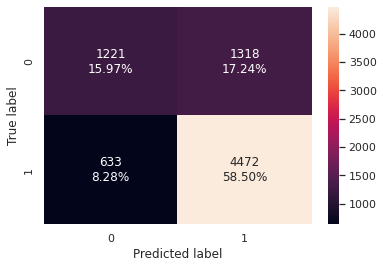

In [ ]:
confusion_matrix_sklearn(gb_classifier, X_test, y_test)

In [ ]:
gb_classifier_model_test_perf = model_performance_classification_sklearn(
    gb_classifier, X_test, y_test
)
gb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.744767,0.876004,0.772366,0.820927


* The model is giving a good and generalized performance.
* We are getting the F1 score of 0.83 and 0.82 on the training and test set, respectively.

### Hyperparameter Tuning - Gradient Boosting Classifier

In [ ]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [200, 250, 300],
    "subsample": [0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=200, random_state=1,
                           subsample=1)

#### Checking model performance on training set

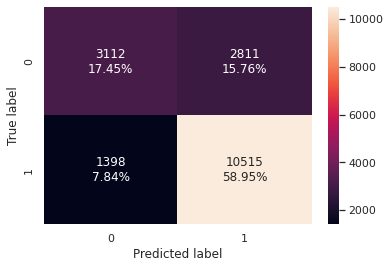

In [ ]:
confusion_matrix_sklearn(gbc_tuned, X_train, y_train)

In [ ]:
gbc_tuned_model_train_perf = model_performance_classification_sklearn(
    gbc_tuned, X_train, y_train
)
gbc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.764017,0.882649,0.789059,0.833234


#### Checking model performance on test set

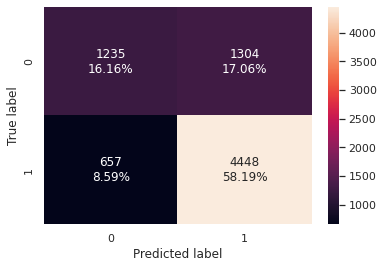

In [ ]:
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

In [ ]:
gbc_tuned_model_test_perf = model_performance_classification_sklearn(
    gbc_tuned, X_test, y_test
)
gbc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.743459,0.871303,0.773296,0.819379


* After tuning there is not much change in the model performance as compared to the model with default values of hyperparameters.

### XGBoost Classifier

In [ ]:
xgb_classifier = XGBClassifier(random_state=1, eval_metric="logloss")
xgb_classifier.fit(X_train, y_train)

XGBClassifier(eval_metric='logloss', random_state=1)

#### Checking model performance on training set

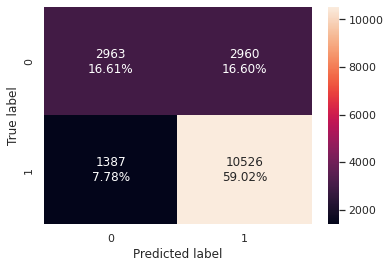

In [ ]:
confusion_matrix_sklearn(xgb_classifier, X_train, y_train)

In [ ]:
xgb_classifier_model_train_perf = model_performance_classification_sklearn(
    xgb_classifier, X_train, y_train
)
xgb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.756279,0.883573,0.780513,0.828852


#### Checking model performance on test set

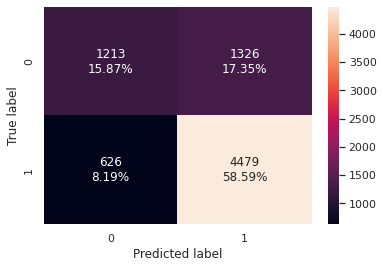

In [ ]:
confusion_matrix_sklearn(xgb_classifier, X_test, y_test)

In [ ]:
xgb_classifier_model_test_perf = model_performance_classification_sklearn(
    xgb_classifier, X_test, y_test
)
xgb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.744636,0.877375,0.771576,0.821082


* The XGBoost model on the training set has performed very well but it is not able to generalize on the test set.

### Hyperparameter Tuning - XGBoost Classifier

In [ ]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(150, 250, 50),
    "scale_pos_weight": [1, 2],
    "subsample": [0.7, 0.9, 1],
    "learning_rate": np.arange(0.1, 0.4, 0.1),
    "gamma": [1, 3, 5],
    "colsample_bytree": [0.7, 0.8, 0.9],
    "colsample_bylevel": [0.8, 0.9, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(colsample_bylevel=0.9, colsample_bytree=0.9,
              eval_metric='logloss', gamma=5, n_estimators=200, random_state=1)

#### Checking model performance on training set

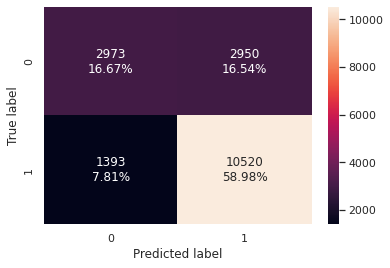

In [101]:
confusion_matrix_sklearn(xgb_tuned, X_train, y_train) 

In [102]:
xgb_tuned_model_train_perf = model_performance_classification_sklearn(
    xgb_tuned, X_train, y_train
)
xgb_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.756504,0.883069,0.780995,0.828901


#### Checking model performance on test set

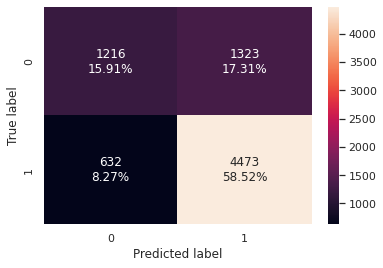

In [103]:
confusion_matrix_sklearn(xgb_tuned, X_test, y_test)

In [104]:
xgb_tuned_model_test_perf = model_performance_classification_sklearn(
    xgb_tuned, X_test, y_test
)
xgb_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.744244,0.8762,0.771739,0.820659


* XGBoost model after tuning is giving a good and generalized performance.
* We have received the F1 score of 0.83 and 0.82 on the training and the test set, respectively.

### Stacking Classifier

In [105]:
estimators = [
    ("AdaBoost", ab_classifier),
    ("Gradient Boosting", gbc_tuned),
    ("Random Forest", rf_tuned),
]

final_estimator = xgb_tuned

stacking_classifier = StackingClassifier(
    estimators=estimators, final_estimator=final_estimator
)

stacking_classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.8,
                                                           n_estimators=200,
                                                           random_state=1,
                                                           subsample=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=10,
                                                       max_features='sqrt',
                                                       min_samples_split=7,
                                                       n_estimators=20,
                                                       oob_score=True,
                                                  

#### Checking model performance on training set

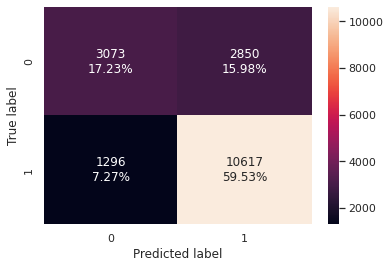

In [106]:
confusion_matrix_sklearn(stacking_classifier, X_train, y_train)

In [107]:
stacking_classifier_model_train_perf = model_performance_classification_sklearn(
    stacking_classifier, X_train, y_train
)
stacking_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.767549,0.891211,0.788372,0.836643


#### Checking model performance on test set

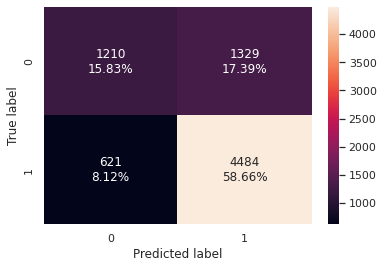

In [108]:
confusion_matrix_sklearn(stacking_classifier, X_test, y_test)

In [109]:
stacking_classifier_model_test_perf = model_performance_classification_sklearn(
    stacking_classifier, X_test, y_test
)
stacking_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.744898,0.878355,0.771375,0.821396


* Stacking model has also given a good and generalized performance.
* The performance is comparable to the XGBoost model.
* We have received F1 scores of 0.83 and 0.81 on the training and test set, respectively.

## Model Performance Comparison and Conclusions

In [110]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dtree_estimator_model_train_perf.T,
        dtree_estimator_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.712548,0.712548,0.985198,0.996187,1.0,0.769119,0.738226,0.719163,0.758802,0.764017,0.756504,0.756504,0.767549
Recall,0.931923,0.931923,0.985982,0.999916,1.0,0.918660,0.887182,0.781415,0.883740,0.882649,0.883069,0.883069,0.891211
Precision,0.720067,0.720067,0.991810,0.994407,1.0,0.776556,0.760688,0.794690,0.783042,0.789059,0.780995,0.780995,0.788372
F1,0.812411,0.812411,0.988887,0.997154,1.0,0.841652,0.819080,0.787997,0.830349,0.833234,0.828901,0.828901,0.836643


In [111]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        dtree_estimator_model_test_perf.T,
        dtree_estimator_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.706567,0.706567,0.691523,0.724228,0.727368,0.738095,0.734301,0.716641,0.744767,0.743459,0.744636,0.744244,0.744898
Recall,0.930852,0.930852,0.764153,0.895397,0.847209,0.898923,0.885015,0.781587,0.876004,0.871303,0.877375,0.876200,0.878355
Precision,0.715447,0.715447,0.771711,0.743857,0.768343,0.755391,0.757799,0.791510,0.772366,0.773296,0.771576,0.771739,0.771375
F1,0.809058,0.809058,0.767913,0.812622,0.805851,0.820930,0.816481,0.786517,0.820927,0.819379,0.821082,0.820659,0.821396


*  Tuned Random Forest model has given a good and generalized performance. We will use it as our final model.
* With the tuned random forest model we are getting the F1 score of 0.84 and 0.82 on the training and the test set, respectively.
* Let's check the important features of the final model.

### Important features of the final model

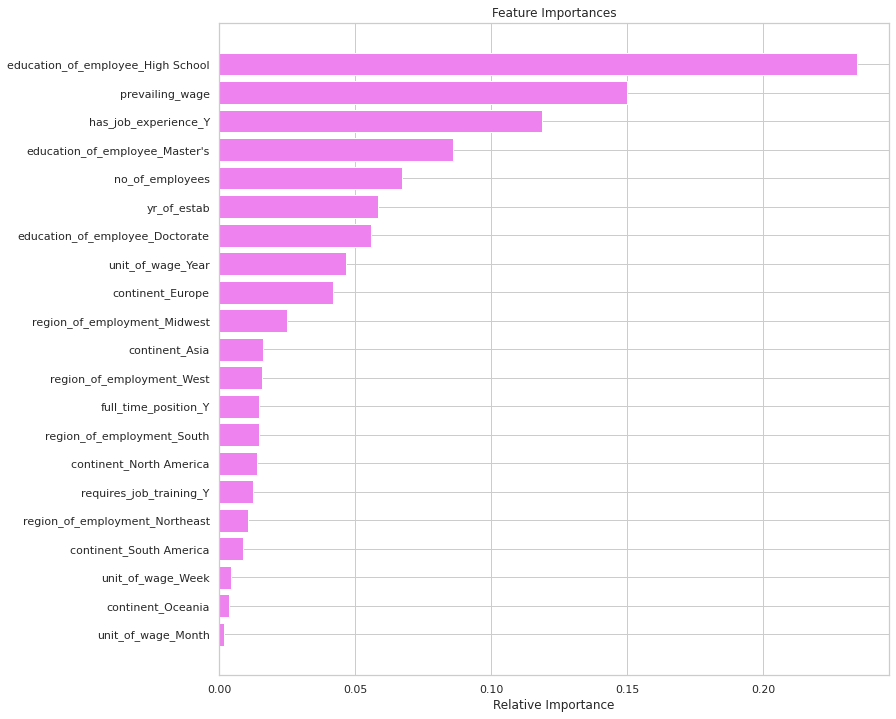

In [112]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Looking at the feature importance of the Random Forest model, the top three important features to look for while certifying a visa are -Education of the employee, Job experience, and Prevailing Wage.

## Actionable Insights and Recommendations

**The profile of the applicants for whom the visa status can be approved:**

**Primary information to look at:**
- `Education level` - At least has a Bachelor's degree - Master's and doctorate are preferred.
- `Job Experience` - Should have some job experience. 
- `Prevailing wage` - The median prevailing wage of the employees for whom the visa got certified is around 72k. 


**Secondary information to look at:**

- `Unit of Wage`    - Applicants having a yearly unit of wage. 
- `Continent`       - Ideally the nationality and ethnicity of an applicant shouldn't matter to work in a country but previously it has been observed that applicants from Europe, Africa, and Asia have higher chances of visa certification.
- `Region of employment` - Our analysis suggests that the applications to work in the Mid-West region have more chances of visa approval. The approvals can also be made based on requirement of talent, from our analysis we see that:
    * The requirement for the applicants who have passed high school is most in the South region, followed by Northeast region.
    * The requirement for Bachelor's is mostly in South region, followed by West region.
    * The requirement for Master's is most in Northeast region, followed by South region.
    * The requirement for Doctorate's is mostly in West region, followed by Northeast region.
    
    
**The profile of the applicants for whom the visa status can be denied:**

**Primary information to look at:**
- `Education level` - Doesn't have any degree and has completed high school.
- `Job Experience` - Doesn't have any job experience. 
- `Prevailing wage` - The median prevailing wage of the employees for whom the visa got certified is around 65k. 


**Secondary information to look at:**

- `Unit of Wage`    - Applicants having an hourly unit of wage. 
- `Continent`       - Ideally the nationality and ethnicity of an applicant shouldn't matter to work in a country but previously it has been observed that applicants from South America, North America, and Oceania have higher chances of visa applications getting denied.

-----------

* Additional information of employers and employees can be collected to gain better insights. Information such as:
   * Employers: Information about  the wage they are offering to the applicant, Sector in which company operates in, etc
   * Employee's: Specialization in their educational degree, Number of years of experience, etc